## Análisis de datos de Encuesta Mundial de Salud Escolar

### Grupo 9
Integrantes:
- Cruz, Ruth
- Gabis Leccesi, Luciana
- Garnica, Rocío
- Gonzalez Navarro, Sol
- Palma, Malena Agustina
- Vidal, Ana
- Stachoni, Yanina

**Dataset seleccionado:**
- Resultados encuesta EMSE
- Origen de datos: https://datos.gob.ar/ar/dataset/salud-base-datos-3deg-encuesta-mundial-salud-escolar-emse-con-resultados-nacionales-argentina

La Encuesta Mundial de Salud Escolar (EMSE) utiliza una metodología estandarizada a nivel mundial para relevar datos sobre aspectos sociodemográficos e indaga sobre conductas relacionadas con el comportamiento alimentario, el consumo de alcohol y otras drogas, la violencia y daños no intencionados, la seguridad vial, la salud mental, el con- sumo de tabaco, la actividad física, los comportamientos sexuales y los factores de protección

**Objetivos:**
* La EMSE abarca muchas temáticas con más de 70 preguntas. Para nuestro estudio decidimos enforcarnos en temas de violencia y daños no intencionados, persiguiendo los siguientes objetivos:
* * Detectar patrones en niños y niñas que han sido víctimas de intimidación, considerando relaciones familiares y con amigos, datos físicos y sociodemográficos.
  * Detectar diferencias en los distintos tipos de intimidación (en escuela, fuera del ámbito escolar, vía internet).
  * Predecir victimas de intimidación.




In [234]:
#Importar las librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer

-------------
Para poder centrarnos en el análisis de los datos que nos resultan relevantes, primero analizamos todas las preguntas y seleccionamos aquellas con las que vamos a trabajar, pudiendo ampliar el análisis luego.

In [235]:
#Leemos Excel creado con el analisis de las preguntas que son de interes
df_conf = pd.read_excel("Analisis Preguntas.xlsx")
print(f"Filas y columnas totales: {df_conf.shape}")
df_conf.head()

Filas y columnas totales: (75, 4)


,Id Pregunta,Pregunta,Relevante,Nombre Columna
0,texto_q1,Edad,Si,edad
1,texto_q2,Sexo,Si,sexo
2,texto_q3,Grado o Año,Si,grado
3,q4,Estatura,Si,altura
4,q5,Peso,Si,peso


In [236]:
#Armamos configuracion de columnas a cargar del dataset
df_conf = df_conf[df_conf["Relevante"] == "Si"]
print(f"Cantidad de preguntas de interés para el análisis: {df_conf.shape[0]}")
columnas_a_leer = df_conf["Id Pregunta"].values
print(f"Columnas a leer: {columnas_a_leer}")
columnas_nombres = df_conf["Nombre Columna"].values
print(f"Título de las columnas: {columnas_nombres}")

Cantidad de preguntas de interés para el análisis: 41
Columnas a leer: ['texto_q1' 'texto_q2' 'texto_q3' 'q4' 'q5' 'texto_q6' 'texto_q16'
 'texto_q17' 'texto_q18' 'texto_q19' 'texto_q22' 'texto_q23' 'texto_q24'
 'texto_q26' 'texto_q27' 'texto_q28' 'texto_q29' 'texto_q33' 'texto_q34'
 'texto_q35' 'texto_q39' 'texto_q40' 'texto_q44' 'texto_q45' 'texto_q49'
 'texto_q51' 'texto_q53' 'texto_q54' 'texto_q55' 'texto_q56' 'texto_q57'
 'texto_q58' 'texto_q59' 'texto_q60' 'texto_q68' 'texto_q76' 'texto_q80'
 'texto_q81' 'texto_qnunwtg' 'texto_qnowtg' 'texto_qnobeseg']
Título de las columnas: ['edad' 'sexo' 'grado' 'altura' 'peso' 'hambre' 'participar_pelea'
 'cantidad_lesiones' 'tipo_lesion' 'causa_lesion' 'sentir_soledad'
 'sentir_preocupacion' 'pensar_suicidio' 'intentar_suicidio'
 'amigos_cercanos' 'edad_cigarrillo' 'dias_fumar' 'padres_fuman'
 'edad_alcohol' 'dias_tomar_alcohol' 'problemas_alcohol' 'edad_drogas'
 'relaciones_sexuales' 'edad_relaciones_sexuales' 'dias_act_fisica'
 'dias_clase

In [237]:
#Ahora si importamos el dataset con las columanas preseleccionadas
df = pd.read_csv("EMSE_DatosAbiertos.csv", usecols=columnas_a_leer)
df.shape

(56981, 41)

In [238]:
#Asignamos  nuevos nombres a las  columnas
df.columns = columnas_nombres
df.head(100)

,edad,sexo,grado,altura,peso,hambre,participar_pelea,cantidad_lesiones,tipo_lesion,causa_lesion,...,padres_revisar,padre_educacion,madre_educacion,intimidacion_internet,amigos_alcohol,sentir_ridiculo,padres_expectativas_altas,bajo_peso,sobre_peso,obeso
0,13 años,Femenino,9no grado nivel Primario/Polimodal o 2do año n...,NaN,NaN,Rara vez,Ninguna,Ninguna,No tuve ninguna lesión seria o grave en los úl...,Dato perdido,...,Dato perdido,Terciario/Universitario completo,Primaria completa,Dato perdido,Definitivamente sí,Dato perdido,Dato perdido,Dato perdido,Dato perdido,Dato perdido
1,13 años,Femenino,9no grado nivel Primario/Polimodal o 2do año n...,NaN,NaN,Nunca,Ninguna,Ninguna,No tuve ninguna lesión seria o grave en los úl...,No sufrí ninguna lesión seria o grave durante ...,...,Nunca,Secundario incompleto,Secundario incompleto,No,Probablemente no,Nunca,Algunas veces,Dato perdido,Dato perdido,Dato perdido
2,14 años,Masculino,2do año/11vo grado nivel Polimodal o 4to año n...,1.67,56.0,Nunca,Ninguna,2 o 3 veces,Tuve un hueso roto o una articulación dislocada,Otra cosa causó mi lesión,...,Nunca,Secundario completo,Secundario completo,No,Definitivamente no,Nunca,Siempre,No,No,No
3,16 años,Masculino,9no grado nivel Primario/Polimodal o 2do año n...,1.73,70.0,Nunca,2 o 3 veces,Ninguna,No tuve ninguna lesión seria o grave en los úl...,Dato perdido,...,Nunca,Secundario incompleto,Secundario incompleto,No,Definitivamente sí,Nunca,Siempre,No,No,No
4,13 años,Femenino,9no grado nivel Primario/Polimodal o 2do año n...,NaN,NaN,Nunca,Ninguna,Dato perdido,Dato perdido,Dato perdido,...,Nunca,Primaria completa,Primaria incompleta,No,Definitivamente no,Nunca,Siempre,Dato perdido,Dato perdido,Dato perdido
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,14 años,Femenino,1er año/10mo grado nivel Polimodal o 3er año n...,1.67,67.0,Nunca,Ninguna,1 vez,Me sucedió otra cosa,Otra cosa causó mi lesión,...,Siempre,Secundario completo,Terciario/Universitario completo,No,Probablemente sí,Rara vez,Siempre,No,Si,No
96,15 años,Femenino,1er año/10mo grado nivel Polimodal o 3er año n...,1.63,62.0,Nunca,2 o 3 veces,1 vez,Tuve un hueso roto o una articulación dislocada,Algo me cayó encima o me golpeó,...,Casi siempre,Secundario completo,Secundario incompleto,Si,Probablemente sí,Rara vez,Casi siempre,No,No,No
97,14 años,Masculino,1er año/10mo grado nivel Polimodal o 3er año n...,NaN,NaN,Rara vez,Ninguna,1 vez,Me sucedió otra cosa,No sufrí ninguna lesión seria o grave durante ...,...,Rara vez,Secundario completo,Secundario incompleto,No,Probablemente sí,Algunas veces,Rara vez,Dato perdido,Dato perdido,Dato perdido
98,14 años,Masculino,1er año/10mo grado nivel Polimodal o 3er año n...,NaN,NaN,Rara vez,Ninguna,Ninguna,No tuve ninguna lesión seria o grave en los úl...,No sufrí ninguna lesión seria o grave durante ...,...,Rara vez,Primaria completa,Primaria completa,No,Probablemente sí,Rara vez,Algunas veces,Dato perdido,Dato perdido,Dato perdido


## Análisis exploratorio de datos

In [239]:
#Conocemos cantidad de filas y columnas del DataFrame
filas, columnas = df.shape
print(f"El DataFrame tiene {format(filas,',').replace(',','.')} filas y {columnas} columnas")

El DataFrame tiene 56.981 filas y 41 columnas


In [240]:
#Vemos algunas filas del df
#Las primeras 10 filas
df.head(10)

,edad,sexo,grado,altura,peso,hambre,participar_pelea,cantidad_lesiones,tipo_lesion,causa_lesion,...,padres_revisar,padre_educacion,madre_educacion,intimidacion_internet,amigos_alcohol,sentir_ridiculo,padres_expectativas_altas,bajo_peso,sobre_peso,obeso
0,13 años,Femenino,9no grado nivel Primario/Polimodal o 2do año n...,NaN,NaN,Rara vez,Ninguna,Ninguna,No tuve ninguna lesión seria o grave en los úl...,Dato perdido,...,Dato perdido,Terciario/Universitario completo,Primaria completa,Dato perdido,Definitivamente sí,Dato perdido,Dato perdido,Dato perdido,Dato perdido,Dato perdido
1,13 años,Femenino,9no grado nivel Primario/Polimodal o 2do año n...,NaN,NaN,Nunca,Ninguna,Ninguna,No tuve ninguna lesión seria o grave en los úl...,No sufrí ninguna lesión seria o grave durante ...,...,Nunca,Secundario incompleto,Secundario incompleto,No,Probablemente no,Nunca,Algunas veces,Dato perdido,Dato perdido,Dato perdido
2,14 años,Masculino,2do año/11vo grado nivel Polimodal o 4to año n...,1.67,56.0,Nunca,Ninguna,2 o 3 veces,Tuve un hueso roto o una articulación dislocada,Otra cosa causó mi lesión,...,Nunca,Secundario completo,Secundario completo,No,Definitivamente no,Nunca,Siempre,No,No,No
3,16 años,Masculino,9no grado nivel Primario/Polimodal o 2do año n...,1.73,70.0,Nunca,2 o 3 veces,Ninguna,No tuve ninguna lesión seria o grave en los úl...,Dato perdido,...,Nunca,Secundario incompleto,Secundario incompleto,No,Definitivamente sí,Nunca,Siempre,No,No,No
4,13 años,Femenino,9no grado nivel Primario/Polimodal o 2do año n...,NaN,NaN,Nunca,Ninguna,Dato perdido,Dato perdido,Dato perdido,...,Nunca,Primaria completa,Primaria incompleta,No,Definitivamente no,Nunca,Siempre,Dato perdido,Dato perdido,Dato perdido
5,13 años,Masculino,9no grado nivel Primario/Polimodal o 2do año n...,1.72,48.0,Nunca,1 vez,1 vez,Tuve un hueso roto o una articulación dislocada,Me caí,...,Nunca,Secundario completo,Terciario/Universitario incompleto,No,Probablemente no,Rara vez,Siempre,No,No,No
6,14 años,Femenino,2do año/11vo grado nivel Polimodal o 4to año n...,NaN,NaN,Algunas veces,Ninguna,Ninguna,No tuve ninguna lesión seria o grave en los úl...,No sufrí ninguna lesión seria o grave durante ...,...,Rara vez,Secundario completo,Secundario completo,No,Definitivamente no,Algunas veces,Algunas veces,Dato perdido,Dato perdido,Dato perdido
7,12 años,Femenino,2do año/11vo grado nivel Polimodal o 4to año n...,NaN,NaN,Nunca,Ninguna,Ninguna,No tuve ninguna lesión seria o grave en los úl...,No sufrí ninguna lesión seria o grave durante ...,...,Nunca,Secundario completo,Secundario completo,No,Definitivamente no,Algunas veces,Algunas veces,Dato perdido,Dato perdido,Dato perdido
8,13 años,Masculino,2do año/11vo grado nivel Polimodal o 4to año n...,NaN,NaN,Casi siempre,2 o 3 veces,2 o 3 veces,Me sucedió otra cosa,Me caí,...,Algunas veces,Secundario incompleto,Secundario completo,No,Probablemente sí,Algunas veces,Algunas veces,Dato perdido,Dato perdido,Dato perdido
9,14 años,Femenino,9no grado nivel Primario/Polimodal o 2do año n...,NaN,NaN,Rara vez,Ninguna,Ninguna,No tuve ninguna lesión seria o grave en los úl...,No sufrí ninguna lesión seria o grave durante ...,...,Nunca,Terciario/Universitario completo,Secundario completo,No,Probablemente sí,Casi siempre,Algunas veces,Dato perdido,Dato perdido,Dato perdido


In [241]:
df.head(100)

,edad,sexo,grado,altura,peso,hambre,participar_pelea,cantidad_lesiones,tipo_lesion,causa_lesion,...,padres_revisar,padre_educacion,madre_educacion,intimidacion_internet,amigos_alcohol,sentir_ridiculo,padres_expectativas_altas,bajo_peso,sobre_peso,obeso
0,13 años,Femenino,9no grado nivel Primario/Polimodal o 2do año n...,NaN,NaN,Rara vez,Ninguna,Ninguna,No tuve ninguna lesión seria o grave en los úl...,Dato perdido,...,Dato perdido,Terciario/Universitario completo,Primaria completa,Dato perdido,Definitivamente sí,Dato perdido,Dato perdido,Dato perdido,Dato perdido,Dato perdido
1,13 años,Femenino,9no grado nivel Primario/Polimodal o 2do año n...,NaN,NaN,Nunca,Ninguna,Ninguna,No tuve ninguna lesión seria o grave en los úl...,No sufrí ninguna lesión seria o grave durante ...,...,Nunca,Secundario incompleto,Secundario incompleto,No,Probablemente no,Nunca,Algunas veces,Dato perdido,Dato perdido,Dato perdido
2,14 años,Masculino,2do año/11vo grado nivel Polimodal o 4to año n...,1.67,56.0,Nunca,Ninguna,2 o 3 veces,Tuve un hueso roto o una articulación dislocada,Otra cosa causó mi lesión,...,Nunca,Secundario completo,Secundario completo,No,Definitivamente no,Nunca,Siempre,No,No,No
3,16 años,Masculino,9no grado nivel Primario/Polimodal o 2do año n...,1.73,70.0,Nunca,2 o 3 veces,Ninguna,No tuve ninguna lesión seria o grave en los úl...,Dato perdido,...,Nunca,Secundario incompleto,Secundario incompleto,No,Definitivamente sí,Nunca,Siempre,No,No,No
4,13 años,Femenino,9no grado nivel Primario/Polimodal o 2do año n...,NaN,NaN,Nunca,Ninguna,Dato perdido,Dato perdido,Dato perdido,...,Nunca,Primaria completa,Primaria incompleta,No,Definitivamente no,Nunca,Siempre,Dato perdido,Dato perdido,Dato perdido
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,14 años,Femenino,1er año/10mo grado nivel Polimodal o 3er año n...,1.67,67.0,Nunca,Ninguna,1 vez,Me sucedió otra cosa,Otra cosa causó mi lesión,...,Siempre,Secundario completo,Terciario/Universitario completo,No,Probablemente sí,Rara vez,Siempre,No,Si,No
96,15 años,Femenino,1er año/10mo grado nivel Polimodal o 3er año n...,1.63,62.0,Nunca,2 o 3 veces,1 vez,Tuve un hueso roto o una articulación dislocada,Algo me cayó encima o me golpeó,...,Casi siempre,Secundario completo,Secundario incompleto,Si,Probablemente sí,Rara vez,Casi siempre,No,No,No
97,14 años,Masculino,1er año/10mo grado nivel Polimodal o 3er año n...,NaN,NaN,Rara vez,Ninguna,1 vez,Me sucedió otra cosa,No sufrí ninguna lesión seria o grave durante ...,...,Rara vez,Secundario completo,Secundario incompleto,No,Probablemente sí,Algunas veces,Rara vez,Dato perdido,Dato perdido,Dato perdido
98,14 años,Masculino,1er año/10mo grado nivel Polimodal o 3er año n...,NaN,NaN,Rara vez,Ninguna,Ninguna,No tuve ninguna lesión seria o grave en los úl...,No sufrí ninguna lesión seria o grave durante ...,...,Rara vez,Primaria completa,Primaria completa,No,Probablemente sí,Rara vez,Algunas veces,Dato perdido,Dato perdido,Dato perdido


In [242]:
# 3 filas aleatoreas
df.sample(3)

,edad,sexo,grado,altura,peso,hambre,participar_pelea,cantidad_lesiones,tipo_lesion,causa_lesion,...,padres_revisar,padre_educacion,madre_educacion,intimidacion_internet,amigos_alcohol,sentir_ridiculo,padres_expectativas_altas,bajo_peso,sobre_peso,obeso
53270,13 años,Femenino,9no grado nivel Primario/Polimodal o 2do año n...,NaN,NaN,Nunca,Ninguna,Ninguna,No tuve ninguna lesión seria o grave en los úl...,No sufrí ninguna lesión seria o grave durante ...,...,Algunas veces,Secundario completo,Secundario incompleto,No,Definitivamente sí,Algunas veces,Algunas veces,Dato perdido,Dato perdido,Dato perdido
45627,14 años,Femenino,8vo grado nivel Primario/Polimodal o 1er año ...,NaN,NaN,Nunca,2 o 3 veces,Ninguna,No tuve ninguna lesión seria o grave en los úl...,No sufrí ninguna lesión seria o grave durante ...,...,Casi siempre,No sé,Secundario incompleto,No,Probablemente sí,Nunca,Siempre,Dato perdido,Dato perdido,Dato perdido
7867,15 años,Femenino,2do año/11vo grado nivel Polimodal o 4to año n...,1.5,48.0,Nunca,Ninguna,Ninguna,No tuve ninguna lesión seria o grave en los úl...,No sufrí ninguna lesión seria o grave durante ...,...,Nunca,Terciario/Universitario completo,Terciario/Universitario completo,No,Probablemente sí,Nunca,Casi siempre,No,No,No


In [243]:
# Las últimas 5 filas
df.tail(5)

,edad,sexo,grado,altura,peso,hambre,participar_pelea,cantidad_lesiones,tipo_lesion,causa_lesion,...,padres_revisar,padre_educacion,madre_educacion,intimidacion_internet,amigos_alcohol,sentir_ridiculo,padres_expectativas_altas,bajo_peso,sobre_peso,obeso
56976,16 años,Masculino,3er año/12vo grado nivel Polimodal o 5to año n...,1.78,86.0,Casi siempre,4 o 5 veces,1 vez,"Recibí un corte, una punzada o puñalada","Fui atacado, agredido, abusado o estaba pelean...",...,Rara vez,Primaria completa,Primaria completa,No,Definitivamente sí,Casi siempre,Rara vez,No,Si,No
56977,16 años,Masculino,3er año/12vo grado nivel Polimodal o 5to año n...,NaN,NaN,Algunas veces,Ninguna,Ninguna,No tuve ninguna lesión seria o grave en los úl...,No sufrí ninguna lesión seria o grave durante ...,...,Rara vez,Secundario completo,Secundario completo,No,Probablemente sí,Casi siempre,Algunas veces,Dato perdido,Dato perdido,Dato perdido
56978,16 años,Masculino,Dato perdido,NaN,NaN,Nunca,Ninguna,Ninguna,No tuve ninguna lesión seria o grave en los úl...,No sufrí ninguna lesión seria o grave durante ...,...,Rara vez,Terciario/Universitario incompleto,Secundario incompleto,No,Probablemente sí,Nunca,Siempre,Dato perdido,Dato perdido,Dato perdido
56979,16 años,Femenino,3er año/12vo grado nivel Polimodal o 5to año n...,NaN,NaN,Nunca,Ninguna,1 vez,Tuve un hueso roto o una articulación dislocada,Me caí,...,Rara vez,Terciario/Universitario completo,Secundario completo,No,Probablemente no,Rara vez,Casi siempre,Dato perdido,Dato perdido,Dato perdido
56980,16 años,Femenino,3er año/12vo grado nivel Polimodal o 5to año n...,1.65,56.0,Rara vez,Ninguna,Dato perdido,Dato perdido,Dato perdido,...,Algunas veces,Terciario/Universitario completo,Terciario/Universitario completo,Si,Probablemente no,Casi siempre,Rara vez,No,No,No


In [244]:
#Conocemos tipo de datos y cantidad de no nulos en cada columna
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56981 entries, 0 to 56980
Data columns (total 41 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   edad                       56873 non-null  object 
 1   sexo                       56981 non-null  object 
 2   grado                      56981 non-null  object 
 3   altura                     36052 non-null  float64
 4   peso                       36052 non-null  float64
 5   hambre                     56981 non-null  object 
 6   participar_pelea           56981 non-null  object 
 7   cantidad_lesiones          56981 non-null  object 
 8   tipo_lesion                56981 non-null  object 
 9   causa_lesion               56981 non-null  object 
 10  sentir_soledad             56981 non-null  object 
 11  sentir_preocupacion        56981 non-null  object 
 12  pensar_suicidio            56981 non-null  object 
 13  intentar_suicidio          56981 non-null  obj

**_Vemos que en la mayoría de las columnas categóricas aparenta no haber datos nulos, vamos a evaluar sus opciones para ver si alguna de ellas se corresponde con un valor nulo_**

In [245]:
print(f"Valores en grado: {df.grado.unique()}")
for columna in df.iloc[:,4:].columns:
    print(f"Valores en {columna}: {df[columna].unique()}")

Valores en grado: ['9no grado nivel Primario/Polimodal o 2do año nivel Secundario'
 '2do año/11vo grado nivel Polimodal o 4to año nivel Secundario'
 'Dato perdido'
 '1er año/10mo grado nivel Polimodal o 3er año nivel Secundario'
 '3er año/12vo grado nivel Polimodal o 5to año nivel Secundario'
 '8vo grado nivel Primario/Polimodal  o 1er año nivel Secundario']
Valores en peso: [ nan  56.  70.  48.  45.  40.  52.  92.  47.  62.  68.  59.  41.  60.
  53.  51.  58.  32.  54.  44.  49.  75.  50.  55.  61. 122.  73.  82.
  81.  72.  63.  76.  43.  57.  67.  84.  42.  46.  64.  69.  74.  71.
 105.  85.  65.  66.  39.  78.  99.  83.  98.  38. 135. 146.  35.  80.
  95.  86. 100.  97. 158.  88.  36. 120.  90. 163.  94.  79.  87. 103.
  77.  91.  33. 169. 155.  89.  37. 112. 102. 108.  93.  31. 101. 156.
 119. 168. 148.  34. 110. 145.  96. 125. 117. 141. 136. 106. 164. 154.
 160.  30. 149. 174. 153. 140. 150. 175. 157. 130. 132. 172. 104. 114.
 152.  28. 118. 165. 131. 123. 166. 161. 151. 180. 109

> Vemos que los valores que no tienen información figuran como "Dato perdido", reemplazamos este valor por np.Nan para poder analizar nulos en conjunto y tratarlos según corresponda

In [246]:
df.replace("Dato perdido", np.nan, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56981 entries, 0 to 56980
Data columns (total 41 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   edad                       56873 non-null  object 
 1   sexo                       56445 non-null  object 
 2   grado                      55920 non-null  object 
 3   altura                     36052 non-null  float64
 4   peso                       36052 non-null  float64
 5   hambre                     56482 non-null  object 
 6   participar_pelea           56713 non-null  object 
 7   cantidad_lesiones          51559 non-null  object 
 8   tipo_lesion                52782 non-null  object 
 9   causa_lesion               51790 non-null  object 
 10  sentir_soledad             56615 non-null  object 
 11  sentir_preocupacion        56584 non-null  object 
 12  pensar_suicidio            55628 non-null  object 
 13  intentar_suicidio          56302 non-null  obj

>  Notamos que el dato "Edad" figura como `object` en lugar de algún tipo `numérico`. Analizamos sus valores para intentar transformarlo a número.

In [247]:
df.edad.unique()

array(['13 años', '14 años', '16 años', '12 años', '15 años',
       '11 años o menos', '17 años', nan, '18 años o más'], dtype=object)

- Con una expresión regular seleccionamos todos los caracteres entre la `a` y la `z`, incluimos la `ñ`, la `á` y espacios.
- Reemplazamos todos esos caracteres por vacío `''`

In [248]:
#Reemplazo de caracteres por ''
df.edad.replace(r'[a-zñá ]', '', regex=True, inplace=True)
#Convertimos ahora la columna a numérica
df.edad = pd.to_numeric(df.edad)
df.edad

0        13.0
1        13.0
2        14.0
3        16.0
4        13.0
         ... 
56976    16.0
56977    16.0
56978    16.0
56979    16.0
56980    16.0
Name: edad, Length: 56981, dtype: float64

## Análisis de datos nulos y outliers

In [249]:
#Generamos una tabla con valor y cantidad de nulos por columna, ordenado descendente desde mayor porcentaje
df_info_nulos = pd.DataFrame()
df_info_nulos['Cantidad'] = df.isnull().sum()
df_info_nulos['Porcentaje'] = (df.isnull().mean() * 100).round(2)
df_info_nulos['Tipo de dato'] = df[df_info_nulos.index].dtypes
df_info_nulos.sort_values(by="Porcentaje", ascending=False)

,Cantidad,Porcentaje,Tipo de dato
obeso,20929,36.73,object
sobre_peso,20929,36.73,object
altura,20929,36.73,float64
peso,20929,36.73,float64
bajo_peso,20929,36.73,object
cantidad_lesiones,5422,9.52,object
causa_lesion,5191,9.11,object
tipo_lesion,4199,7.37,object
edad_alcohol,3643,6.39,object
relaciones_sexuales,2989,5.25,object


In [250]:
#Analizamos datos estadísticos de las columnas numéricas con datos nulos
datos_numericos = df[["altura","peso","edad"]].describe().T
datos_numericos["moda"] = df[["altura","peso","edad"]].mode().T
datos_numericos.rename(columns={"mean":"media", "50%": "mediana"}, inplace=True)
datos_numericos

,count,media,std,min,25%,mediana,75%,max,moda
altura,36052.0,1.642857,0.096898,1.2,1.57,1.64,1.7,2.03,1.6
peso,36052.0,60.212193,14.723909,27.0,51.00,58.00,66.0,187.00,60.0
edad,56873.0,14.905403,1.358115,11.0,14.00,15.00,16.0,18.00,14.0


- Para `altura` y `edad` vemos que tienen una desviación estándar baja, por lo tanto los valores se ubican cerca de la media
- También notamos ques los valores de media, mediana y moda son similares por lo que tendrían una distribución de frecuencias simétrica.
- Hacemos un gráfico para comprobarlo

c:\Users\PC\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


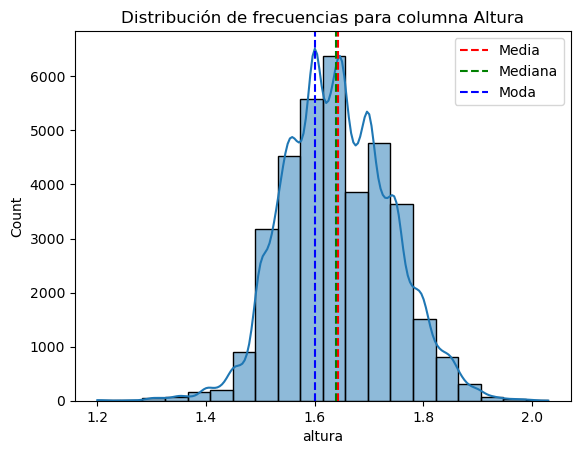

In [251]:
fig = sns.histplot(df, x="altura", kde=True, bins=20)
fig.axvline(datos_numericos.loc["altura"].media, color='r', linestyle='--', label="Media")
fig.axvline(datos_numericos.loc["altura"].mediana, color='g', linestyle='--', label="Mediana")
fig.axvline(datos_numericos.loc["altura"].moda, color='b', linestyle='--', label="Moda")
fig.set_title("Distribución de frecuencias para columna Altura")
fig.legend()

c:\Users\PC\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


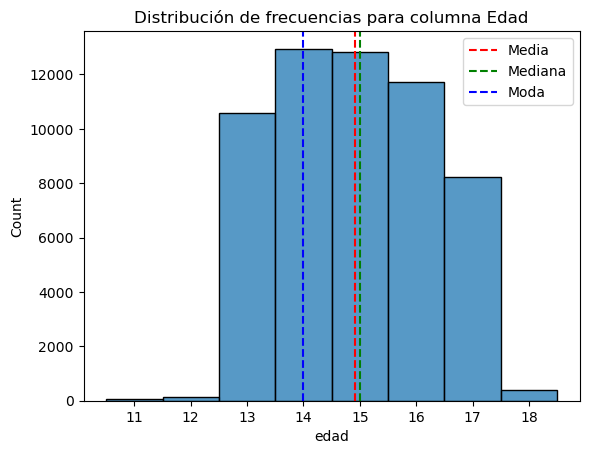

In [252]:
fig = sns.histplot(df, x="edad", discrete=True)
fig.axvline(datos_numericos.loc["edad"].media, color='r', linestyle='--', label="Media")
fig.axvline(datos_numericos.loc["edad"].mediana, color='g', linestyle='--', label="Mediana")
fig.axvline(datos_numericos.loc["edad"].moda, color='b', linestyle='--', label="Moda")
fig.set_title("Distribución de frecuencias para columna Edad")
fig.legend()

**_Para los dos casos, rellenamos nulos con el valor de la mediana_**

In [253]:
imputer = SimpleImputer(missing_values=np.nan, strategy="median")
df.altura = imputer.fit_transform(df[['altura']])
df.edad = imputer.fit_transform(df[['edad']])
df[["altura","edad"]].describe()

,altura,edad
count,56981.000000,56981.000000
mean,1.641807,14.905583
std,0.077087,1.356834
min,1.200000,11.000000
25%,1.610000,14.000000
50%,1.640000,15.000000
75%,1.670000,16.000000
max,2.030000,18.000000


- Analizamos la dispersión y outliers para el caso de la columna `peso`. Ya que al tener una desviación estándar alta, los datos se asume que están dispersos. Con una media, moda y mediana cercanos pero con un sesgo a la derecha ya que la media (60.21) es mayor a la mediana (58)

c:\Users\PC\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


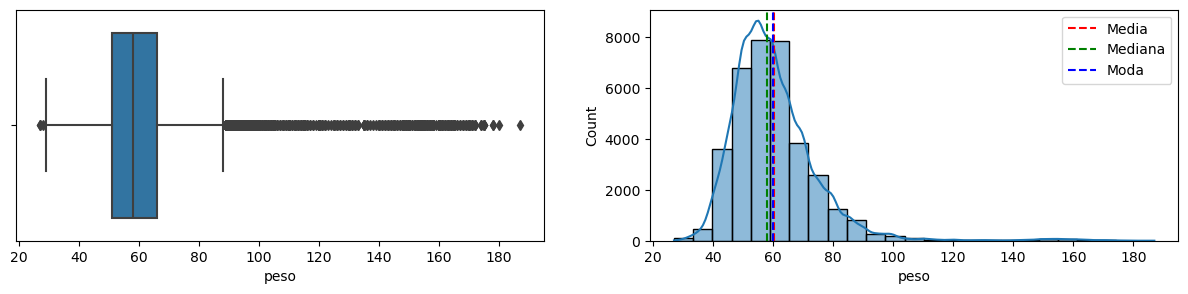

In [254]:
#Grafico de bigotes e histograma para evaluar la dispersión
f, (ax_box, ax_hist) = plt.subplots(1,2, figsize=(15, 3), sharex=False, sharey=False)

sns.boxplot(data=df, x="peso", ax=ax_box)

sns.histplot(data=df, x="peso", ax=ax_hist, bins=25, kde=True)

ax_hist.axvline(datos_numericos.loc["peso"].media, color='r', linestyle='--', label="Media")
ax_hist.axvline(datos_numericos.loc["peso"].mediana, color='g', linestyle='--', label="Mediana")
ax_hist.axvline(datos_numericos.loc["peso"].moda, color='b', linestyle='--', label="Moda")
ax_hist.legend()


plt.show()

Filas no nulas df original: 36052
Filas no nulas sin outliers: 34878
Filas removidas: 1174
Medidas estadísticas originales
count    36052.000000
mean        60.212193
std         14.723909
min         27.000000
25%         51.000000
50%         58.000000
75%         66.000000
max        187.000000
Name: peso, dtype: float64
Medidas estadísticas sin outliers
count    34878.000000
mean        58.526722
std         10.712567
min         29.000000
25%         50.000000
50%         57.000000
75%         65.000000
max         88.000000
Name: peso, dtype: float64


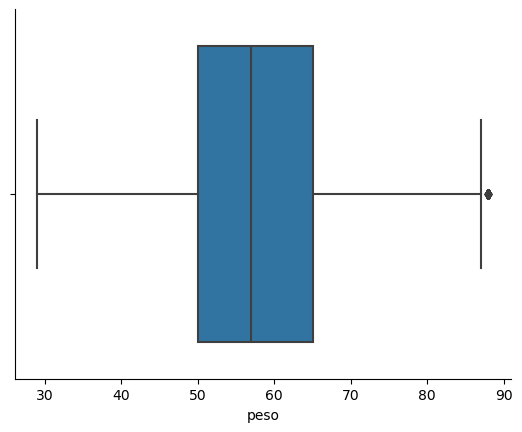

In [255]:
#Analizamos cuantos son los outliers y como cambia la descripción estadística de la columna sin ellos
q1, q3 = df["peso"].quantile([.25, .75])
ric = q3 - q1 #rango inter quartil
l_inf = q1 - 1.5 * ric
l_sup = q3 + 1.5 * ric
df_sin_outliers = df[df["peso"].between(l_inf, l_sup)]
print(f"Filas no nulas df original: {df.peso.count()}")
print(f"Filas no nulas sin outliers: {df_sin_outliers.peso.count()}")
print(f"Filas removidas: {df.peso.count() - df_sin_outliers.peso.count()}")
print("Medidas estadísticas originales")
print(df.peso.describe().T)
print("Medidas estadísticas sin outliers")
print(df_sin_outliers.peso.describe().T)
sns.boxplot(data=df_sin_outliers, x="peso")
sns.despine()

> Como el porcentaje de datos removidos es chico (2% --> 1174 filas en 56981 del total de filas), removemos los outliers y rellenamos nulos con la media

In [256]:
df = df_sin_outliers
imputer = SimpleImputer(missing_values=np.nan, strategy="mean")
df.peso = imputer.fit_transform(df[['peso']])
df[["peso"]].describe()

,peso
count,34878.000000
mean,58.526722
std,10.712567
min,29.000000
25%,50.000000
50%,57.000000
75%,65.000000
max,88.000000


- Como `obeso`, `bajo_peso` y `sobre_peso` están calculados a partir de una fórmula que desconocemos y tienen alto porcentaje en datos nulos eliminaremos esas columnas.

In [257]:
df.drop(columns=["obeso", "bajo_peso","sobre_peso"], inplace=True)
df.columns

Index(['edad', 'sexo', 'grado', 'altura', 'peso', 'hambre', 'participar_pelea',
       'cantidad_lesiones', 'tipo_lesion', 'causa_lesion', 'sentir_soledad',
       'sentir_preocupacion', 'pensar_suicidio', 'intentar_suicidio',
       'amigos_cercanos', 'edad_cigarrillo', 'dias_fumar', 'padres_fuman',
       'edad_alcohol', 'dias_tomar_alcohol', 'problemas_alcohol',
       'edad_drogas', 'relaciones_sexuales', 'edad_relaciones_sexuales',
       'dias_act_fisica', 'dias_clase_ef', 'dias_falta_clases',
       'otros_amables', 'padres_tarea', 'padres_atencion',
       'padres_tiempo_libre', 'padres_revisar', 'padre_educacion',
       'madre_educacion', 'intimidacion_internet', 'amigos_alcohol',
       'sentir_ridiculo', 'padres_expectativas_altas'],
      dtype='object')

In [258]:
#Volvemos a analizar nulos con los cambios hechos hasta ahora
df_info_nulos = pd.DataFrame()
df_info_nulos['Cantidad'] = df.isnull().sum()
df_info_nulos['Porcentaje'] = (df.isnull().mean() * 100).round(2)
df_info_nulos['Tipo de dato'] = df[df_info_nulos.index].dtypes
df_info_nulos.sort_values(by="Porcentaje", ascending=False)

,Cantidad,Porcentaje,Tipo de dato
cantidad_lesiones,3245,9.30,object
causa_lesion,3152,9.04,object
tipo_lesion,2522,7.23,object
edad_alcohol,1961,5.62,object
relaciones_sexuales,1553,4.45,object
edad_drogas,1530,4.39,object
edad_relaciones_sexuales,1497,4.29,object
padres_expectativas_altas,1195,3.43,object
dias_tomar_alcohol,1186,3.40,object
padres_atencion,1134,3.25,object


**_Todos los datos faltantes se corresponden con columnas categóricas. Utilizaremos un método de relleno basado en el siguiente valor para las columnas con un porcentaje mayor de datos faltantes y el resto rellenaremos con el `más frecuente`_**

In [259]:
df.cantidad_lesiones.ffill(inplace=True)
df.causa_lesion.ffill(inplace=True)
df.tipo_lesion.ffill(inplace=True)
df[["cantidad_lesiones","causa_lesion","tipo_lesion"]].isnull().sum()

cantidad_lesiones    0
causa_lesion         0
tipo_lesion          0
dtype: int64

In [260]:
df_info_nulos['Cantidad'] = df.isnull().sum()
df_info_nulos['Porcentaje'] = (df.isnull().mean() * 100).round(2)
df_info_nulos['Tipo de dato'] = df[df_info_nulos.index].dtypes
df_info_nulos.sort_values(by="Porcentaje", ascending=False)

,Cantidad,Porcentaje,Tipo de dato
edad_alcohol,1961,5.62,object
relaciones_sexuales,1553,4.45,object
edad_drogas,1530,4.39,object
edad_relaciones_sexuales,1497,4.29,object
padres_expectativas_altas,1195,3.43,object
dias_tomar_alcohol,1186,3.40,object
padres_atencion,1134,3.25,object
sentir_ridiculo,1126,3.23,object
dias_clase_ef,956,2.74,object
padres_revisar,949,2.72,object


In [261]:
#Llenamos los nulos con la opción más frecuente.
imputer_frequent = SimpleImputer(missing_values=np.NaN, strategy="most_frequent")

In [262]:
for columna in df_info_nulos[df_info_nulos["Porcentaje"] > 0].index:
    datos_imputados = imputer_frequent.fit_transform(df[[columna]])
    df[columna] =  datos_imputados[:,0]


In [263]:
#Chequeamos que no queden nulos
df.isnull().sum()

edad                         0
sexo                         0
grado                        0
altura                       0
peso                         0
hambre                       0
participar_pelea             0
cantidad_lesiones            0
tipo_lesion                  0
causa_lesion                 0
sentir_soledad               0
sentir_preocupacion          0
pensar_suicidio              0
intentar_suicidio            0
amigos_cercanos              0
edad_cigarrillo              0
dias_fumar                   0
padres_fuman                 0
edad_alcohol                 0
dias_tomar_alcohol           0
problemas_alcohol            0
edad_drogas                  0
relaciones_sexuales          0
edad_relaciones_sexuales     0
dias_act_fisica              0
dias_clase_ef                0
dias_falta_clases            0
otros_amables                0
padres_tarea                 0
padres_atencion              0
padres_tiempo_libre          0
padres_revisar               0
padre_ed

In [264]:
#Guardamos nuevo csv con el DataFrame sin datos nulos
df.to_csv("EMSE_DatosAnalisisBullying.csv", index=False)

## Transformación de datos categóricos

## Gráficos

c:\Users\PC\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


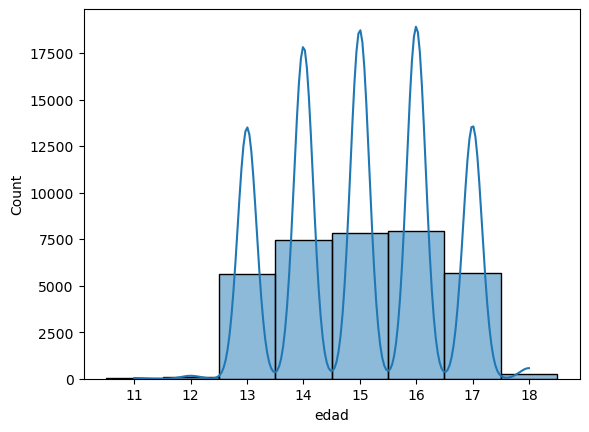

c:\Users\PC\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


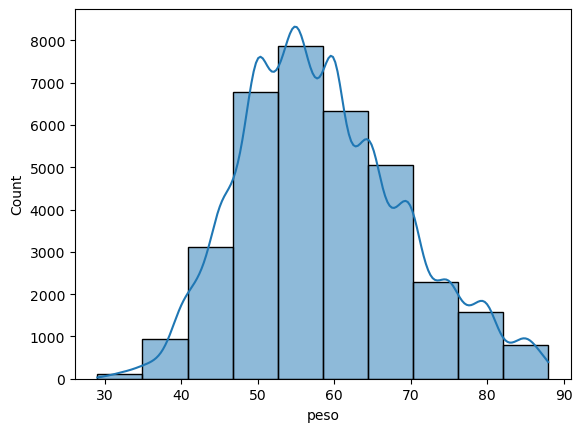

c:\Users\PC\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


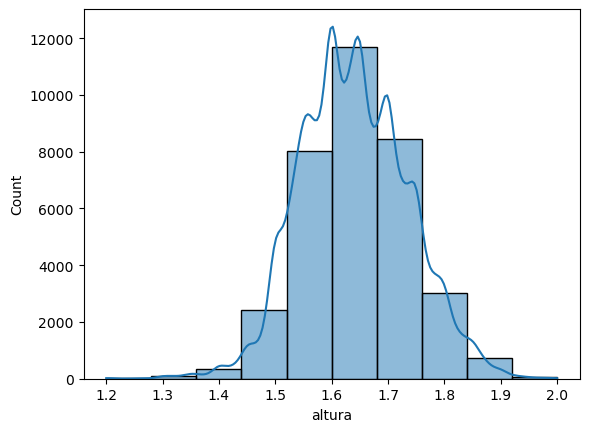

In [265]:
#Gráfico de densidad de las columnas numéricas
sns.histplot(df.edad,discrete=True, kde=True)
plt.show()
sns.histplot(df.peso, bins = 10,kde=True)
plt.show()
sns.histplot(df.altura, bins = 10,kde=True)
plt.show()

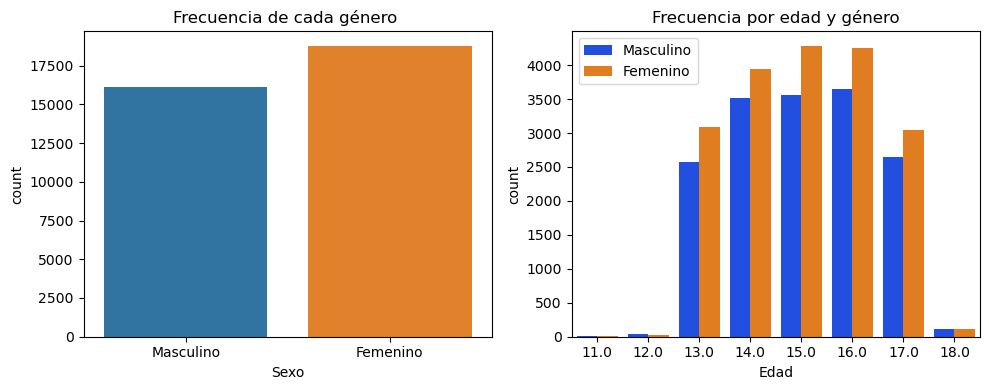

In [266]:
#Frecuencia por edad y sexo
fig, axes = plt.subplots(1,2, figsize=(10, 4))

# Trazar el primer gráfico en el primer eje
sns.countplot(data=df, x="sexo", ax=axes[0])
axes[0].set_xlabel('Sexo')
axes[0].set_title('Frecuencia de cada género ')

# Trazar el segundo gráfico en el segundo eje
sns.countplot(data=df, x="edad", hue="sexo", palette="bright",  ax=axes[1])
axes[1].set_xlabel('Edad')
axes[1].set_title('Frecuencia por edad y género')
axes[1].legend()

# Ajustar el diseño de los subgráficos
plt.tight_layout()


In [267]:
newdf= df 
print(newdf ) 

       edad       sexo                                              grado  \
2      14.0  Masculino  2do año/11vo grado nivel Polimodal o 4to año n...   
3      16.0  Masculino  9no grado nivel Primario/Polimodal o 2do año n...   
5      13.0  Masculino  9no grado nivel Primario/Polimodal o 2do año n...   
10     15.0  Masculino  9no grado nivel Primario/Polimodal o 2do año n...   
13     14.0   Femenino  2do año/11vo grado nivel Polimodal o 4to año n...   
...     ...        ...                                                ...   
56972  16.0  Masculino  3er año/12vo grado nivel Polimodal o 5to año n...   
56974  16.0  Masculino  3er año/12vo grado nivel Polimodal o 5to año n...   
56975  15.0  Masculino  3er año/12vo grado nivel Polimodal o 5to año n...   
56976  16.0  Masculino  3er año/12vo grado nivel Polimodal o 5to año n...   
56980  16.0   Femenino  3er año/12vo grado nivel Polimodal o 5to año n...   

       altura  peso        hambre participar_pelea cantidad_lesiones  \
2  

In [268]:
# Algunos datos interesantes analizados : 
# Cantidad de mujeres que fueron lesionadas : ninguna vez, 1 vez o entre 2 o 3 veces 
df_femenino = df[df['sexo'] == 'Femenino']

# Contar la cantidad de mujeres en cada categoría de lesiones
conteo_lesiones_femenino = df_femenino['cantidad_lesiones'].value_counts().reindex(['Ninguna', '1 vez', '2 o 3 veces','4 o 5 veces'], fill_value=0)


print(conteo_lesiones_femenino)


cantidad_lesiones
Ninguna        12959
1 vez           3428
2 o 3 veces     1592
4 o 5 veces      413
Name: count, dtype: int64


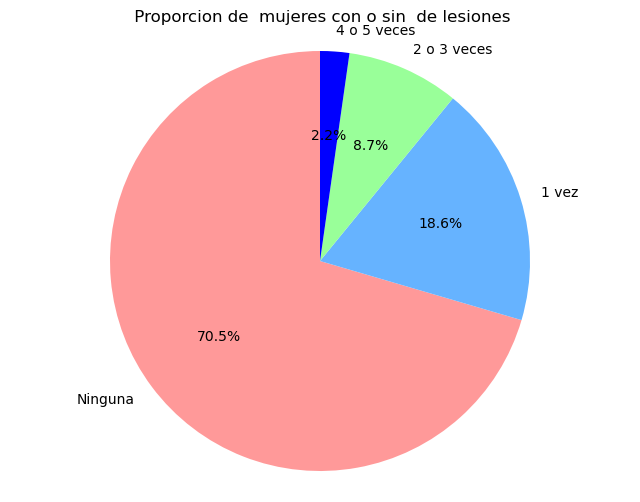

In [269]:
import matplotlib.pyplot as plt

# Datos a analizar 
labels = ['Ninguna', '1 vez', '2 o 3 veces', '4 o 5 veces']
sizes = conteo_lesiones_femenino.values

# Colores para el grafico 
colors = ['#ff9999','#66b3ff','#99ff99','blue' ]

# Creamos  el gráfico de tortas
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)

# Añadimos  título
plt.title(' Proporcion de  mujeres con o sin  de lesiones')

# Mostramos  el gráfico
plt.axis('equal')
plt.show()


In [270]:
# Algunos datos interesantes analizados : 
# Cantidad de masculinos  que fueron lesionadas : ninguna vez, 1 vez o entre 2 o 3 veces 
df_masculino = df[df['sexo'] == 'Masculino']

# Cuenta  la cantidad de veces q masculinas sufrieron o no  lesiones 
conteo_lesiones_masculino = df_masculino['cantidad_lesiones'].value_counts().reindex(['Ninguna', '1 vez', '2 o 3 veces'], fill_value=0)


print(conteo_lesiones_masculino)

cantidad_lesiones
Ninguna        9403
1 vez          3838
2 o 3 veces    1950
Name: count, dtype: int64


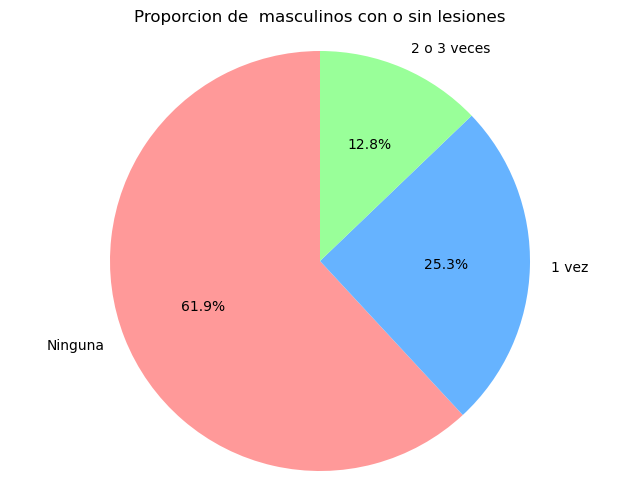

In [271]:
import matplotlib.pyplot as plt

# Datos
labels = ['Ninguna', '1 vez', '2 o 3 veces']
sizes = conteo_lesiones_masculino.values

# Colores
colors = ['#ff9999','#66b3ff','#99ff99']

# Crear el gráfico de tortas
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)

# Añadir título
plt.title('Proporcion de  masculinos con o sin lesiones')

# Mostrar el gráfico
plt.axis('equal')
plt.show()

In [272]:
# Algunos datos interesantes analizados : 
# Cantidad de masculinos  que hayan o no participado alguna vez en peleas  
df_masculino = df[df['sexo'] == 'Masculino']

# Contamos  la cantidad de masculinos  que alguna vez participaron  o no en peleas 
conteo_lesiones_masculino = df_masculino['participar_pelea'].value_counts().reindex(['Ninguna', '1 vez', '2 o 3 veces'], fill_value=0)


print(conteo_lesiones_masculino)

participar_pelea
Ninguna        10844
1 vez           2538
2 o 3 veces     1528
Name: count, dtype: int64


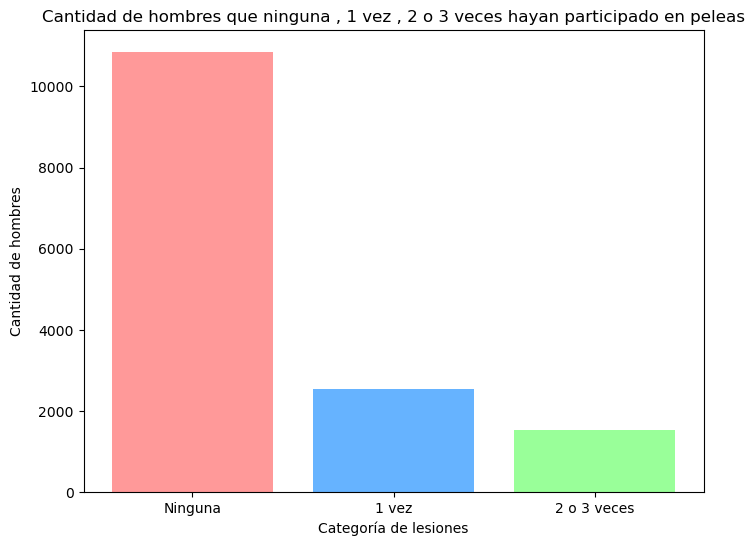

In [273]:
# Graficamos los resultados 
import matplotlib.pyplot as plt

# Filtramos  los datos para obtener solo los  masculinos
df_masculino = df[df['sexo'] == 'Masculino']

# Contamos  la cantidad de hombres  que hayan o no participado en peleas 
conteo_lesiones_masculino = df_masculino['participar_pelea'].value_counts().reindex(['Ninguna', '1 vez', '2 o 3 veces'], fill_value=0)

# Creamos un  gráfico de barras
plt.figure(figsize=(8, 6))
plt.bar(conteo_lesiones_masculino.index, conteo_lesiones_masculino.values, color=['#ff9999','#66b3ff','#99ff99'])

# Añadimos los  títulos  y etiquetas
plt.title('Cantidad de hombres que ninguna , 1 vez , 2 o 3 veces hayan participado en peleas')
plt.xlabel('Categoría de lesiones')
plt.ylabel('Cantidad de hombres')

plt.show()
